# 🧢 Jockey Distribution Report 2024
## Complete Data Analysis & Visualization — Matplotlib & Seaborn
---
| Library | Purpose |
|---|---|
| **Pandas** | Data cleaning, filtering, manipulation |
| **Matplotlib** | Bar, Barh, Pie, Line, Scatter, Histogram, Stacked Area |
| **Seaborn** | Heatmap, Boxplot, Violin, Countplot, KDE, Strip |
| **NumPy** | Numerical operations |

> **Distributor:** Chirag Paul &nbsp;|&nbsp; **Territory:** Agartala, Tripura &nbsp;|&nbsp; **Period:** Jan–Dec 2024


## 📦 Import Libraries

In [1]:
# ── Core ──────────────────────────────────────────────────
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ── Matplotlib ────────────────────────────────────────────
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
%matplotlib inline

# ── Seaborn ───────────────────────────────────────────────
import seaborn as sns
sns.set_theme(style='whitegrid', palette='muted')

# Global chart settings
plt.rcParams['figure.dpi']        = 110
plt.rcParams['font.family']       = 'DejaVu Sans'
plt.rcParams['axes.spines.top']   = False
plt.rcParams['axes.spines.right'] = False

print('✅ All libraries imported successfully!')

✅ All libraries imported successfully!


## 📂 Raw Data Info

In [1]:
df = pd.read_csv('ChiragPaul_Jockey_Distributor_2024.csv')
print(f'Shape : {df.shape}')
df.head()

Shape : (1138, 37)


In [1]:
df.info()

RangeIndex: 1138 entries, 0 to 1137
Data columns (total 32 columns):
  0  Transaction_ID                      1138 non-null   str
  1  Order_ID                            1138 non-null   str
  2  Order_Date                          1138 non-null   datetime64[us]
  3  Delivery_Date                       1100 non-null   datetime64[us]
  4  Month                               1138 non-null   category
  5  Quarter                             1138 non-null   str
  6  Distributor_Name                    1138 non-null   str
  7  Distributor_Location                1138 non-null   str
  8  Retailer_ID                         1138 non-null   str
  9  Retailer_Name                       1138 non-null   str
 10  Retailer_Area                       1138 non-null   str
 11  Retailer_Type                       1138 non-null   str
 12  Request_Channel                     1138 non-null   str
 13  Section                             1138 non-null   str
 14  SKU_Code                            1138 non-

In [1]:
df.describe().round(2)

                       Order_Date               Delivery_Date  Qty_Requested  Qty_Supplied  Unit_Dist_Price_INR  MRP_per_Unit_INR  Gross_Amt  Discount_Percent  Discount_Amount_INR    Net_Amt  GST_Percent  GST_Amount_INR  Invoice_Amt  Delivery_Days  Fulfillment_Rate  Profit_Margin
count                        1138                        1100        1138.00       1138.00              1138.00           1138.00    1138.00           1138.00              1138.00    1138.00       1138.0         1138.00      1138.00        1100.00           1138.00        1100.00
mean   2024-07-12 08:45:07.908611  2024-07-14 08:37:05.454545          69.86         66.97               214.26            306.08   14674.94              3.66               541.38   14133.56         12.0         1696.03     15829.58           3.00             95.82          10.71
min           2024-01-01 00:00:00         2024-01-02 00:00:00           9.00          0.00                63.00             90.00       0.00              0.0

## 🧹 Data Cleaning

In [1]:
# ── 3.1 Missing Values ─────────────────────────────────────
print('=== Missing Values ===')
miss = df.isnull().sum()
display(miss[miss > 0].to_frame('Count').assign(Pct=lambda x: (x['Count']/len(df)*100).round(2)))

df['Payment_Status'] = df['Payment_Status'].fillna('Unknown')
df['Remarks']        = df['Remarks'].fillna('No Remarks')

# ── 3.2 Data Types ──────────────────────────────────────────
df['Order_Date']    = pd.to_datetime(df['Order_Date'],    dayfirst=True)
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'].replace('Awaited', pd.NaT), dayfirst=True, errors='coerce')

num_cols = ['Qty_Requested','Qty_Supplied','Unit_Dist_Price_INR','MRP_per_Unit_INR',
            'Gross_Amount_INR','Discount_Amount_INR','Net_Amount_INR',
            'GST_Amount_INR','Invoice_Amount_INR']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# ── 3.3 Strip Whitespace ────────────────────────────────────
for c in df.select_dtypes('object').columns:
    df[c] = df[c].str.strip()

# ── 3.4 Remove Duplicates ───────────────────────────────────
before = len(df)
df.drop_duplicates(inplace=True)
print(f'\nDuplicates removed : {before - len(df)}')

# ── 3.5 Rename ──────────────────────────────────────────────
df.rename(columns={'Invoice_Amount_INR':'Invoice_Amt',
                   'Net_Amount_INR':'Net_Amt',
                   'Gross_Amount_INR':'Gross_Amt'}, inplace=True)

print('\n✅ Data Cleaning Complete. Shape :', df.shape)

=== Missing Values ===
  Delivery_Date: 38 (3.34%)
  Delivery_Days: 38 (3.34%)
  Profit_Margin: 38 (3.34%)

Duplicates removed : 0

✅ Data Cleaning Complete. Shape : (1138, 37)

## 🔍 Data Filtering

In [1]:
# Fulfilled orders only
df_fulfilled = df[df['Order_Status'] == 'Fulfilled']

# Discounted orders
df_disc = df[df['Discount_Percent'] > 0]

# Unpaid / pending
df_unpaid = df[df['Payment_Status'].isin(['Due (Pending)', 'Partially Paid'])]

# High value orders (Invoice > 50K)
df_highval = df[df['Invoice_Amt'] > 50000]

# Q4 only
df_q4 = df[df['Quarter'] == 'Q4']

print(f'Fulfilled       : {len(df_fulfilled)}')
print(f'Discounted      : {len(df_disc)}')
print(f'Unpaid/Pending  : {len(df_unpaid)}')
print(f'High Value>50K  : {len(df_highval)}')
print(f'Q4 Orders       : {len(df_q4)}')

Fulfilled       : 1065
Discounted      : 647
Unpaid/Pending  : 133
High Value>50K  : 48
Q4 Orders       : 358


## 🔧 Data Manipulation

In [1]:
# New columns
df['Delivery_Days']      = (df['Delivery_Date'] - df['Order_Date']).dt.days
df['Fulfillment_Rate']   = (df['Qty_Supplied'] / df['Qty_Requested'] * 100).round(2)
df['Profit_Margin']      = ((df['Invoice_Amt'] - df['Net_Amt']) / df['Invoice_Amt'] * 100).round(2)
df['Retailer_City']      = df['Retailer_Area'].str.split(',').str[0].str.strip()

def rev_band(x):
    if x < 10000: return 'Low (<10K)'
    elif x < 50000: return 'Medium (10–50K)'
    else: return 'High (>50K)'
df['Revenue_Band'] = df['Invoice_Amt'].apply(rev_band)

MONTH_ORDER = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']
df['Month'] = pd.Categorical(df['Month'], categories=MONTH_ORDER, ordered=True)

# Aggregates
monthly_rev   = df.groupby('Month', observed=True)['Invoice_Amt'].sum().reset_index()
section_rev   = df.groupby('Section')['Invoice_Amt'].sum().sort_values(ascending=False)
quarter_rev   = df.groupby('Quarter')['Invoice_Amt'].sum().reset_index()
status_cnt    = df['Order_Status'].value_counts()
pay_status    = df['Payment_Status'].value_counts()
channel_cnt   = df['Request_Channel'].value_counts()
retailer_type = df.groupby('Retailer_Type')['Invoice_Amt'].sum().sort_values(ascending=False)
pay_mode      = df.groupby('Payment_Mode')['Invoice_Amt'].sum().sort_values(ascending=False)
top_retailers = df.groupby('Retailer_Name')['Invoice_Amt'].sum().sort_values(ascending=False).head(10)
sec_delivery  = df.groupby('Section')['Delivery_Days'].mean().round(1).sort_values()
monthly_qty   = df.groupby('Month', observed=True)['Qty_Supplied'].sum().reset_index()

print('✅ Manipulation Complete.')
df[['Transaction_ID','Delivery_Days','Fulfillment_Rate','Revenue_Band']].head(5)

✅ Manipulation Complete.
  Transaction_ID  Delivery_Days  Fulfillment_Rate     Revenue_Band
0    TXN-CP-0001            1.0             100.0  Medium (10–50K)
1    TXN-CP-0002            5.0             100.0  Medium (10–50K)
2    TXN-CP-0003            3.0             100.0       Low (<10K)
3    TXN-CP-0004            1.0             100.0  Medium (10–50K)
4    TXN-CP-0005            1.0             100.0  Medium (10–50K)

---
# 📊 MATPLOTLIB VISUALIZATIONS
---

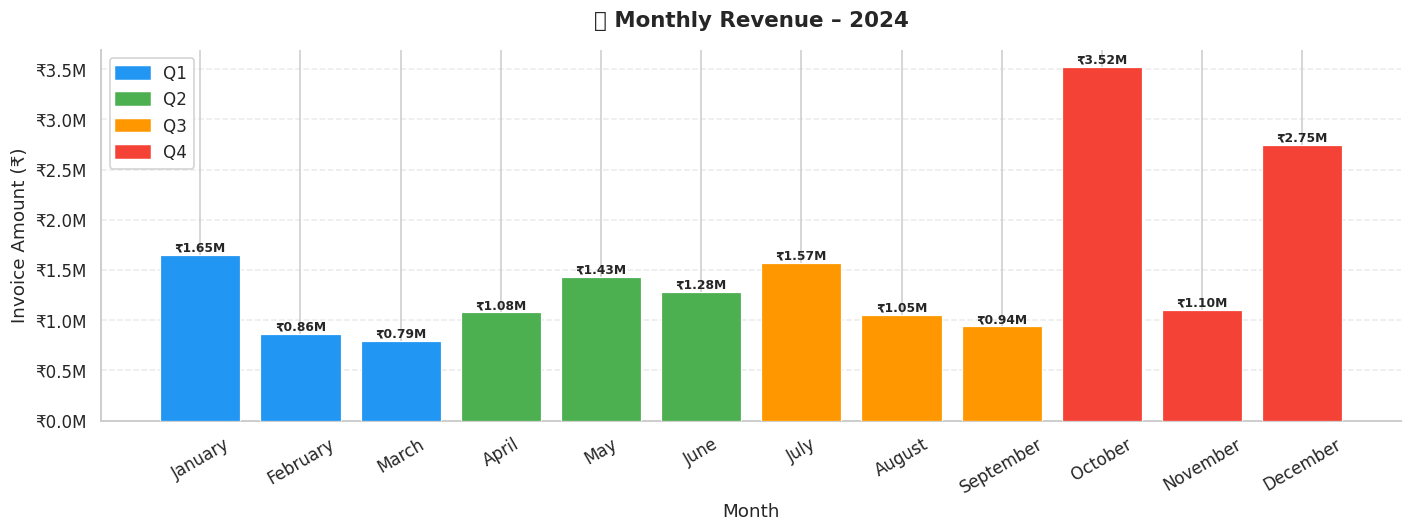

In [1]:
# ════════════════════════════════════════════════════
# MPL-1 │ BAR CHART — Monthly Revenue
# ════════════════════════════════════════════════════
q_color_map = {'January':'#2196F3','February':'#2196F3','March':'#2196F3',
               'April':'#4CAF50','May':'#4CAF50','June':'#4CAF50',
               'July':'#FF9800','August':'#FF9800','September':'#FF9800',
               'October':'#F44336','November':'#F44336','December':'#F44336'}
colors = [q_color_map[m] for m in monthly_rev['Month']]

fig, ax = plt.subplots(figsize=(13, 5))
bars = ax.bar(monthly_rev['Month'].astype(str), monthly_rev['Invoice_Amt'],
              color=colors, edgecolor='white', linewidth=0.8, zorder=3)
for b in bars:
    h = b.get_height()
    ax.text(b.get_x()+b.get_width()/2, h+8000, f'₹{h/1e6:.2f}M',
            ha='center', va='bottom', fontsize=8, fontweight='bold')

patches = [mpatches.Patch(color='#2196F3',label='Q1'), mpatches.Patch(color='#4CAF50',label='Q2'),
           mpatches.Patch(color='#FF9800',label='Q3'), mpatches.Patch(color='#F44336',label='Q4')]
ax.legend(handles=patches, loc='upper left', framealpha=0.9)
ax.set_title('📊 Monthly Revenue – 2024', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Month'); ax.set_ylabel('Invoice Amount (₹)')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x,_: f'₹{x/1e6:.1f}M'))
ax.tick_params(axis='x', rotation=30)
ax.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)
plt.tight_layout(); plt.show()

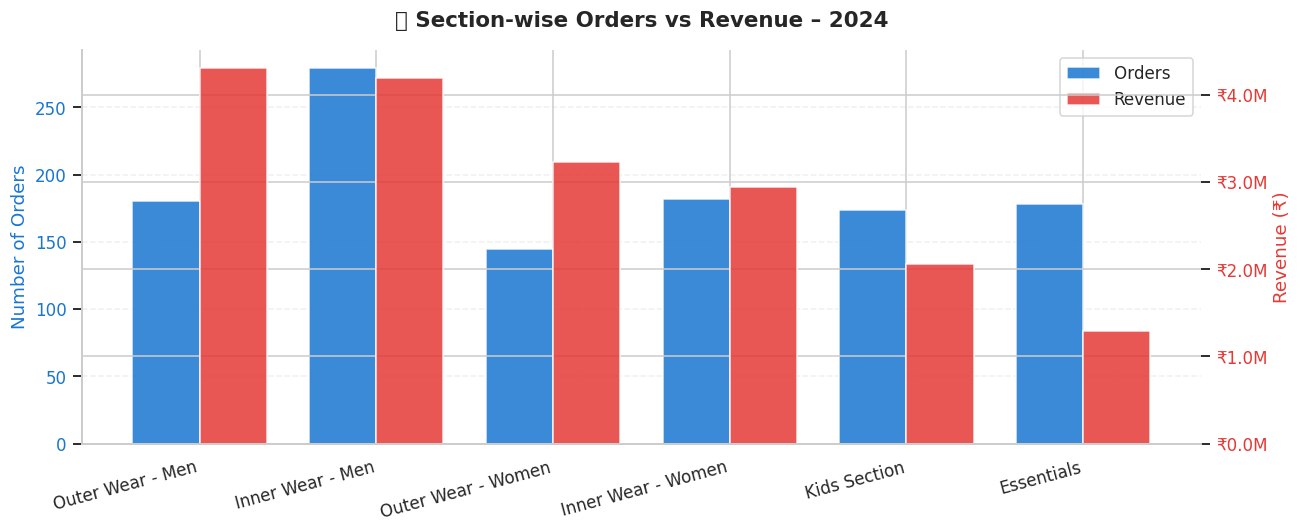

In [1]:
# ════════════════════════════════════════════════════
# MPL-2 │ BAR CHART — Section-wise Orders & Revenue
# ════════════════════════════════════════════════════
sec_grp = df.groupby('Section').agg(
    Orders  = ('Transaction_ID','count'),
    Revenue = ('Invoice_Amt','sum')
).reset_index().sort_values('Revenue', ascending=False)

x = np.arange(len(sec_grp)); w = 0.38
fig, ax1 = plt.subplots(figsize=(12, 5)); ax2 = ax1.twinx()
b1 = ax1.bar(x-w/2, sec_grp['Orders'],  width=w, color='#1976D2', label='Orders',  alpha=0.85)
b2 = ax2.bar(x+w/2, sec_grp['Revenue'], width=w, color='#E53935', label='Revenue', alpha=0.85)
ax1.set_xticks(x); ax1.set_xticklabels(sec_grp['Section'], rotation=15, ha='right')
ax1.set_ylabel('Number of Orders', color='#1976D2'); ax1.tick_params(axis='y', labelcolor='#1976D2')
ax2.set_ylabel('Revenue (₹)', color='#E53935'); ax2.tick_params(axis='y', labelcolor='#E53935')
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x,_: f'₹{x/1e6:.1f}M'))
ax1.legend([b1,b2], ['Orders','Revenue'], loc='upper right')
ax1.set_title('📊 Section-wise Orders vs Revenue – 2024', fontsize=14, fontweight='bold', pad=15)
ax1.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout(); plt.show()

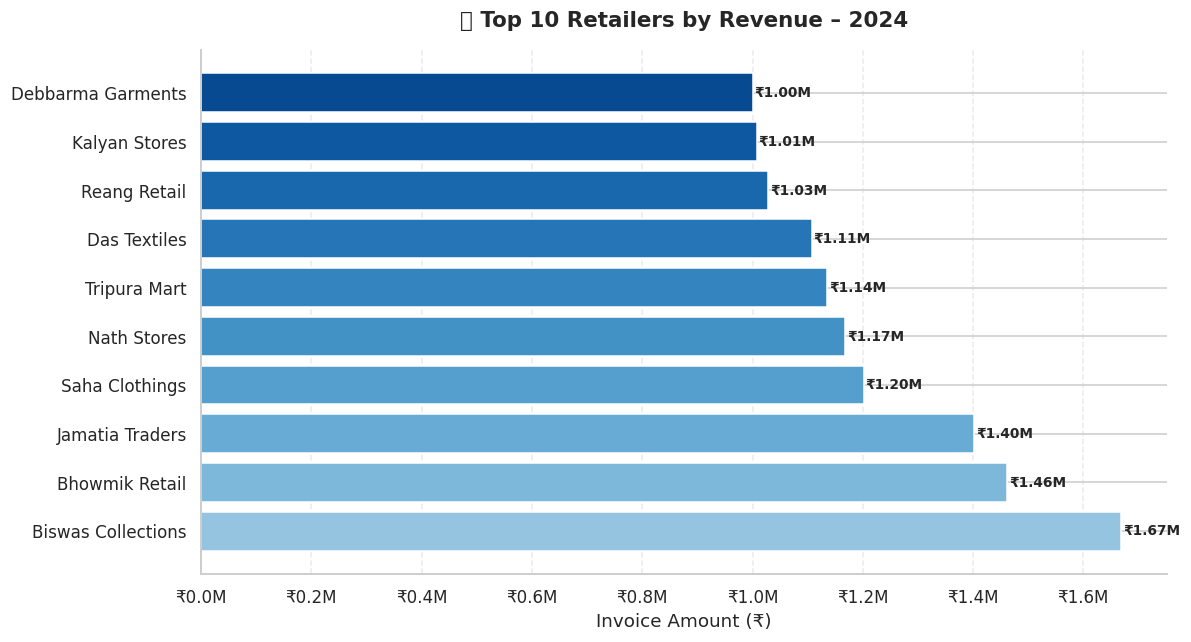

In [1]:
# ════════════════════════════════════════════════════
# MPL-3 │ BARH CHART — Top 10 Retailers by Revenue
# ════════════════════════════════════════════════════
palette = plt.cm.Blues(np.linspace(0.4, 0.9, 10))
fig, ax = plt.subplots(figsize=(11, 6))
bars = ax.barh(top_retailers.index, top_retailers.values, color=palette, edgecolor='white')
for b in bars:
    w = b.get_width()
    ax.text(w+3000, b.get_y()+b.get_height()/2,
            f'₹{w/1e6:.2f}M', va='center', fontsize=9, fontweight='bold')
ax.set_title('📉 Top 10 Retailers by Revenue – 2024', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Invoice Amount (₹)')
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x,_: f'₹{x/1e6:.1f}M'))
ax.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout(); plt.show()

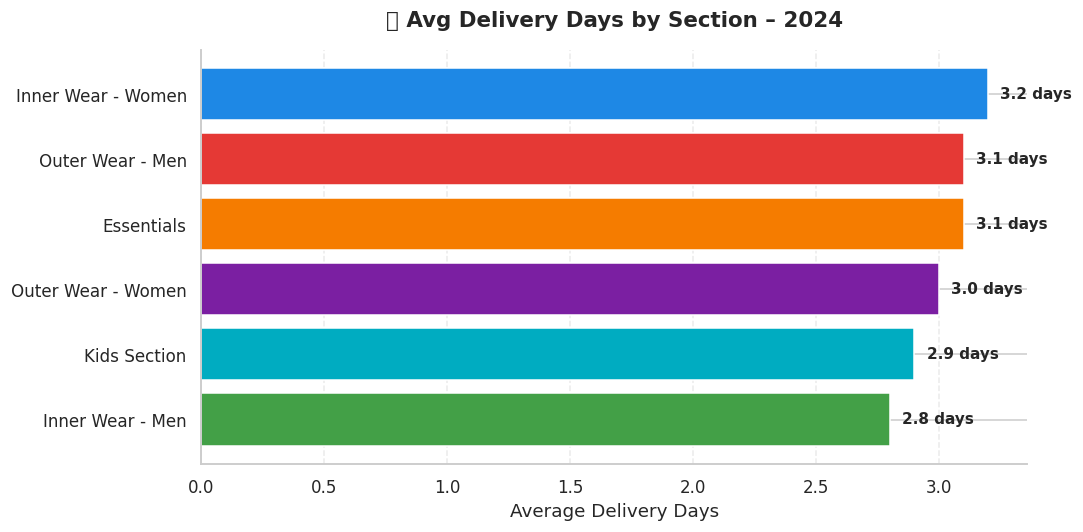

In [1]:
# ════════════════════════════════════════════════════
# MPL-4 │ BARH CHART — Avg Delivery Days by Section
# ════════════════════════════════════════════════════
sec_c = ['#43A047','#00ACC1','#7B1FA2','#F57C00','#E53935','#1E88E5']
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(sec_delivery.index, sec_delivery.values, color=sec_c, edgecolor='white')
for b in bars:
    ax.text(b.get_width()+0.05, b.get_y()+b.get_height()/2,
            f'{b.get_width()} days', va='center', fontsize=10, fontweight='bold')
ax.set_title('📉 Avg Delivery Days by Section – 2024', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Average Delivery Days')
ax.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout(); plt.show()

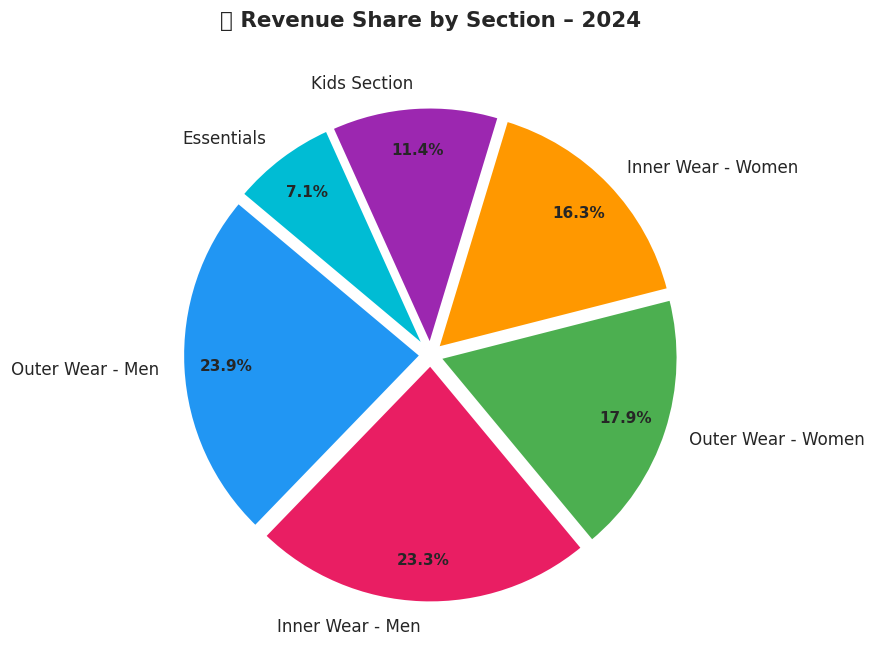

In [1]:
# ════════════════════════════════════════════════════
# MPL-5 │ PIE CHART — Section Revenue Share
# ════════════════════════════════════════════════════
pie_c = ['#2196F3','#E91E63','#4CAF50','#FF9800','#9C27B0','#00BCD4']
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autos = ax.pie(
    section_rev.values, labels=section_rev.index,
    autopct='%1.1f%%', startangle=140, colors=pie_c, explode=[0.04]*len(section_rev),
    pctdistance=0.82, wedgeprops=dict(edgecolor='white', linewidth=2))
for a in autos: a.set_fontsize(10); a.set_fontweight('bold')
ax.set_title('🥧 Revenue Share by Section – 2024', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout(); plt.show()

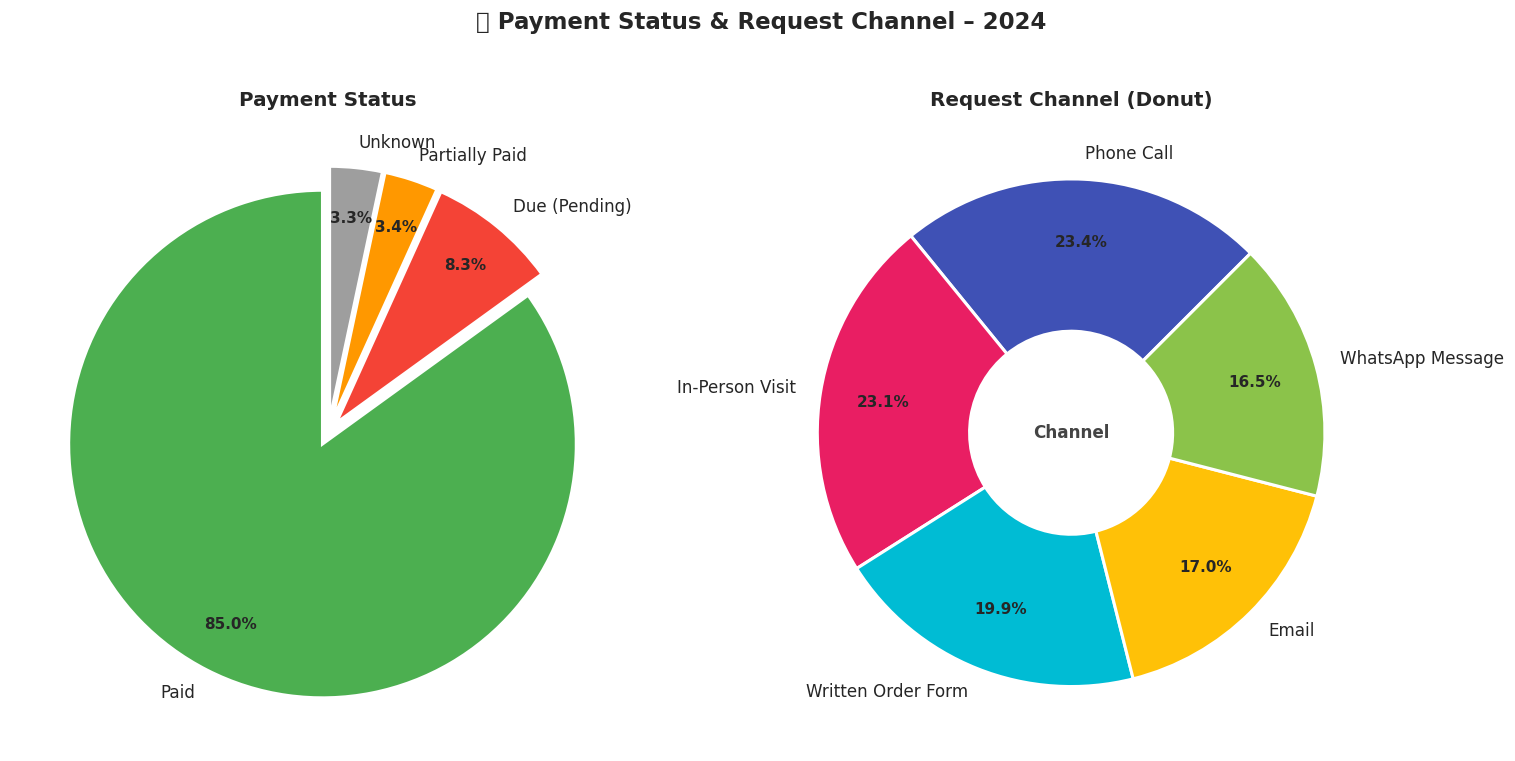

In [1]:
# ════════════════════════════════════════════════════
# MPL-6 │ PIE CHARTS — Payment Status & Request Channel
# ════════════════════════════════════════════════════
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
pc1 = ['#4CAF50','#F44336','#FF9800','#9E9E9E']
wedges1, _, autos1 = ax1.pie(pay_status.values, labels=pay_status.index,
    autopct='%1.1f%%', startangle=90, colors=pc1, explode=[0.05]*len(pay_status),
    pctdistance=0.80, wedgeprops=dict(edgecolor='white', linewidth=2))
for a in autos1: a.set_fontsize(10); a.set_fontweight('bold')
ax1.set_title('Payment Status', fontsize=13, fontweight='bold')

pc2 = ['#3F51B5','#E91E63','#00BCD4','#FFC107','#8BC34A']
wedges2, _, autos2 = ax2.pie(channel_cnt.values, labels=channel_cnt.index,
    autopct='%1.1f%%', startangle=45, colors=pc2, pctdistance=0.75,
    wedgeprops=dict(edgecolor='white', linewidth=2, width=0.6))
for a in autos2: a.set_fontsize(10); a.set_fontweight('bold')
ax2.text(0, 0, 'Channel', ha='center', va='center', fontsize=11, fontweight='bold', color='#444')
ax2.set_title('Request Channel (Donut)', fontsize=13, fontweight='bold')
fig.suptitle('🥧 Payment Status & Request Channel – 2024', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout(); plt.show()

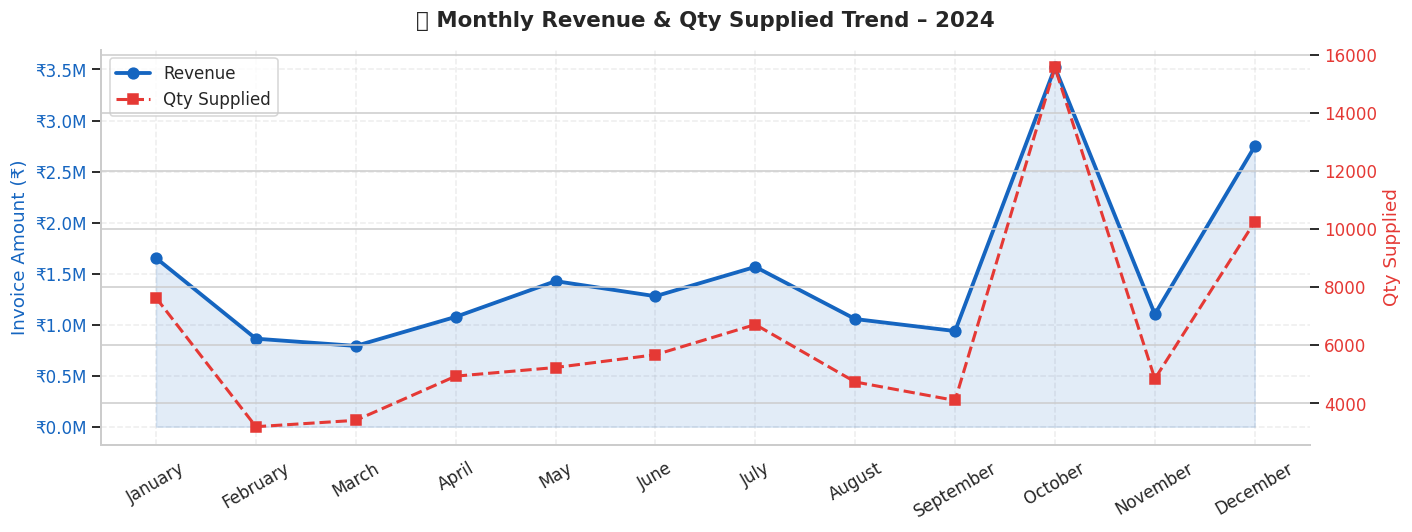

In [1]:
# ════════════════════════════════════════════════════
# MPL-7 │ LINE CHART — Monthly Revenue & Qty Trend
# ════════════════════════════════════════════════════
fig, ax1 = plt.subplots(figsize=(13, 5)); ax2 = ax1.twinx()
x_labels = monthly_rev['Month'].astype(str)
ax1.plot(x_labels, monthly_rev['Invoice_Amt'], color='#1565C0',
         marker='o', linewidth=2.5, markersize=7, label='Revenue')
ax1.fill_between(x_labels, monthly_rev['Invoice_Amt'], alpha=0.12, color='#1565C0')
ax2.plot(x_labels, monthly_qty['Qty_Supplied'], color='#E53935',
         marker='s', linewidth=2, linestyle='--', markersize=6, label='Qty Supplied')
ax1.set_ylabel('Invoice Amount (₹)', color='#1565C0')
ax2.set_ylabel('Qty Supplied', color='#E53935')
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x,_: f'₹{x/1e6:.1f}M'))
ax1.tick_params(axis='x', rotation=30); ax1.tick_params(axis='y', labelcolor='#1565C0')
ax2.tick_params(axis='y', labelcolor='#E53935')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1+lines2, labels1+labels2, loc='upper left')
ax1.set_title('📈 Monthly Revenue & Qty Supplied Trend – 2024', fontsize=14, fontweight='bold', pad=15)
ax1.grid(linestyle='--', alpha=0.35)
plt.tight_layout(); plt.show()

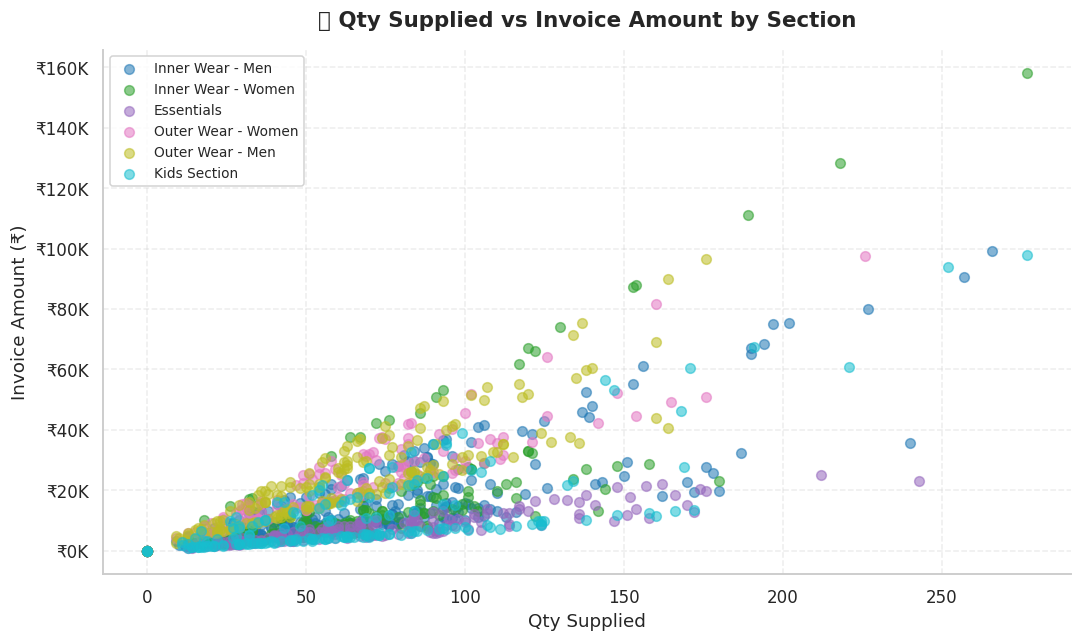

In [1]:
# ════════════════════════════════════════════════════
# MPL-8 │ SCATTER CHART — Qty Supplied vs Invoice Amount
# ════════════════════════════════════════════════════
sections = df['Section'].unique()
cmap = plt.cm.get_cmap('tab10', len(sections))
sec_color = {s: cmap(i) for i, s in enumerate(sections)}
fig, ax = plt.subplots(figsize=(10, 6))
for sec in sections:
    sub = df[df['Section'] == sec]
    ax.scatter(sub['Qty_Supplied'], sub['Invoice_Amt'], alpha=0.55, s=40, color=sec_color[sec], label=sec)
ax.set_title('🔵 Qty Supplied vs Invoice Amount by Section', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Qty Supplied'); ax.set_ylabel('Invoice Amount (₹)')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x,_: f'₹{x/1e3:.0f}K'))
ax.legend(loc='upper left', fontsize=9, framealpha=0.85)
ax.grid(linestyle='--', alpha=0.35)
plt.tight_layout(); plt.show()

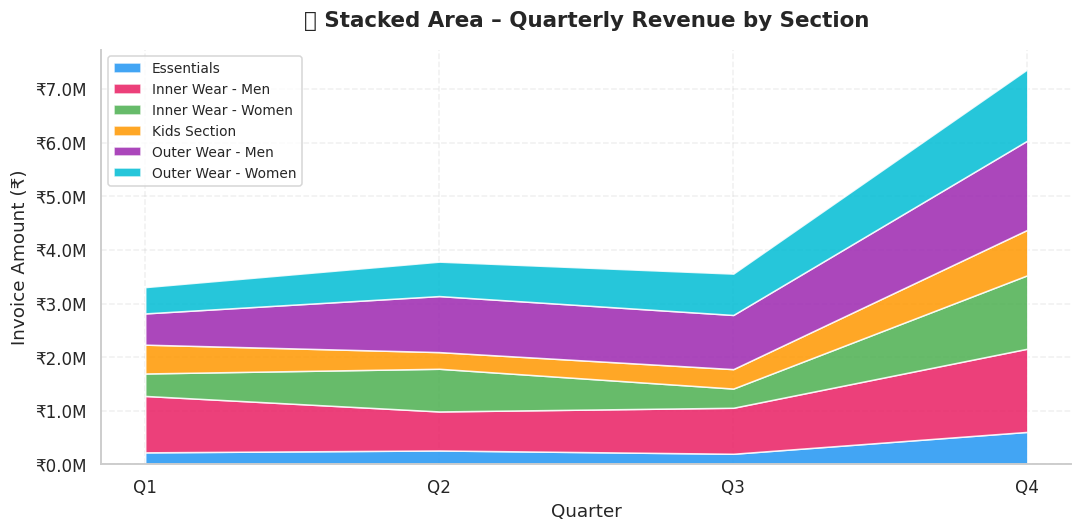

In [1]:
# ════════════════════════════════════════════════════
# MPL-9 │ STACKED AREA CHART — Quarterly Revenue by Section
# ════════════════════════════════════════════════════
pivot_area = df.pivot_table(index='Quarter', columns='Section',
                            values='Invoice_Amt', aggfunc='sum').fillna(0)
area_colors = ['#2196F3','#E91E63','#4CAF50','#FF9800','#9C27B0','#00BCD4']
fig, ax = plt.subplots(figsize=(10, 5))
ax.stackplot(pivot_area.index, pivot_area.T.values,
             labels=pivot_area.columns, colors=area_colors, alpha=0.85)
ax.set_title('📈 Stacked Area – Quarterly Revenue by Section', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Quarter'); ax.set_ylabel('Invoice Amount (₹)')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x,_: f'₹{x/1e6:.1f}M'))
ax.legend(loc='upper left', fontsize=9)
ax.grid(linestyle='--', alpha=0.3)
plt.tight_layout(); plt.show()

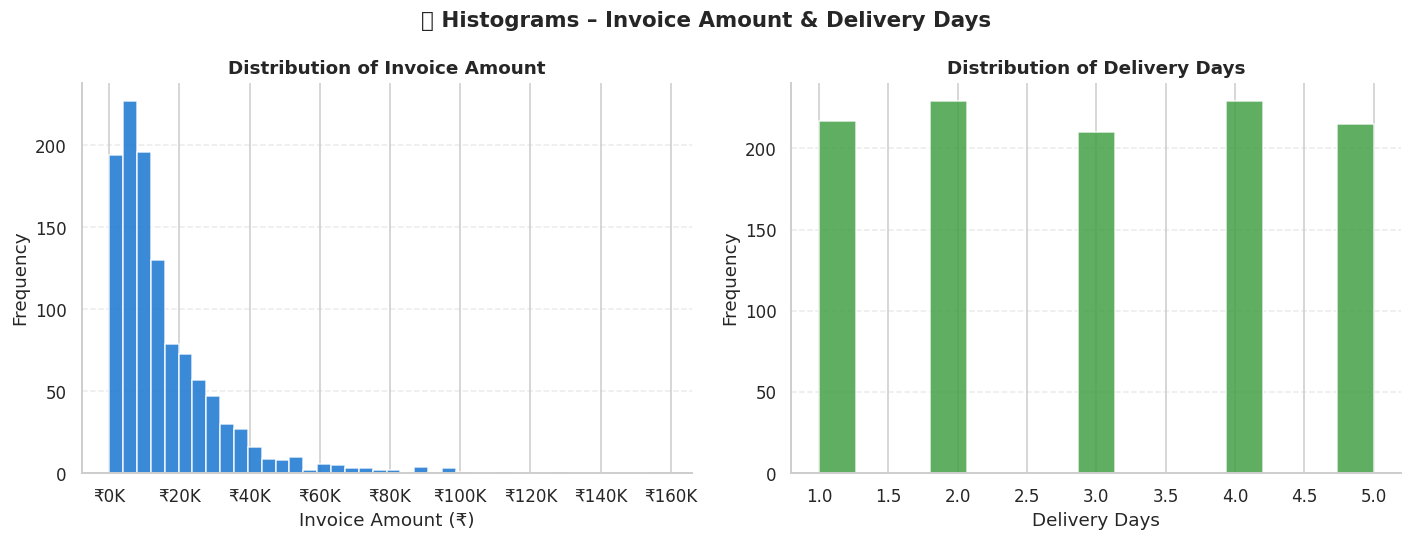

In [1]:
# ════════════════════════════════════════════════════
# MPL-10 │ HISTOGRAM — Invoice Amount & Delivery Days
# ════════════════════════════════════════════════════
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
axes[0].hist(df['Invoice_Amt'], bins=40, color='#1976D2', edgecolor='white', alpha=0.85)
axes[0].set_title('Distribution of Invoice Amount', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Invoice Amount (₹)'); axes[0].set_ylabel('Frequency')
axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x,_: f'₹{x/1e3:.0f}K'))
axes[0].grid(axis='y', linestyle='--', alpha=0.4)

axes[1].hist(df['Delivery_Days'].dropna(), bins=15, color='#43A047', edgecolor='white', alpha=0.85)
axes[1].set_title('Distribution of Delivery Days', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Delivery Days'); axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', linestyle='--', alpha=0.4)

fig.suptitle('📊 Histograms – Invoice Amount & Delivery Days', fontsize=14, fontweight='bold')
plt.tight_layout(); plt.show()

---
# 🎨 SEABORN VISUALIZATIONS
---

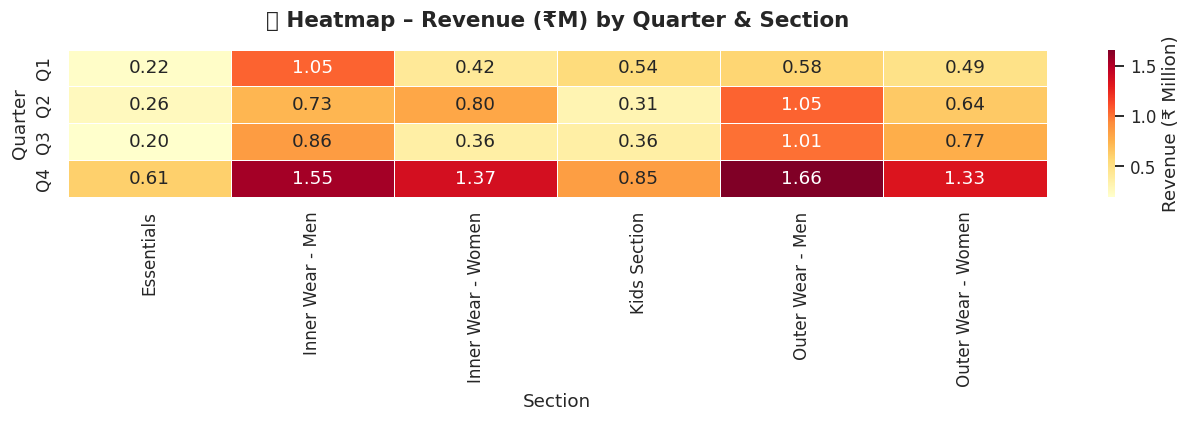

In [1]:
# ════════════════════════════════════════════════════
# SNS-1 │ HEATMAP — Quarter × Section Revenue
# ════════════════════════════════════════════════════
pivot_heat = df.pivot_table(index='Quarter', columns='Section',
                            values='Invoice_Amt', aggfunc='sum') / 1e6
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(pivot_heat.round(2), annot=True, fmt='.2f', cmap='YlOrRd',
            linewidths=0.5, linecolor='white', ax=ax,
            cbar_kws={'label': 'Revenue (₹ Million)'})
ax.set_title('🔥 Heatmap – Revenue (₹M) by Quarter & Section', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Section'); ax.set_ylabel('Quarter')
plt.tight_layout(); plt.show()

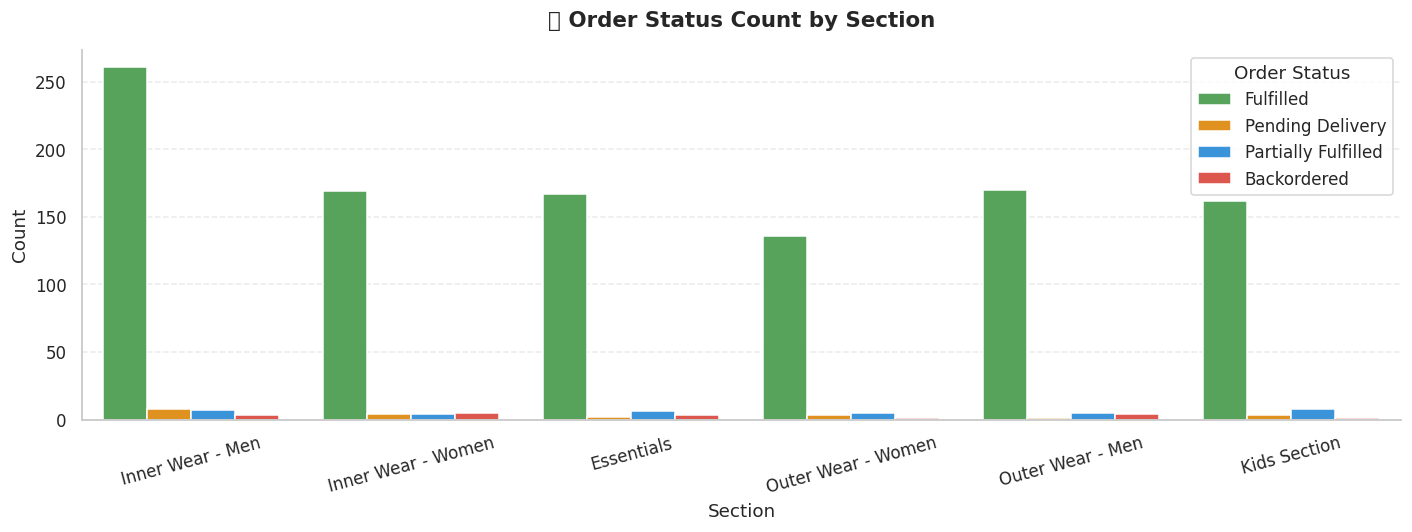

In [1]:
# ════════════════════════════════════════════════════
# SNS-2 │ COUNTPLOT — Order Status by Section
# ════════════════════════════════════════════════════
fig, ax = plt.subplots(figsize=(13, 5))
sns.countplot(data=df, x='Section', hue='Order_Status',
              palette=['#4CAF50','#FF9800','#2196F3','#F44336'], ax=ax)
ax.set_title('📊 Order Status Count by Section', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Section'); ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=15)
ax.legend(title='Order Status', loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout(); plt.show()

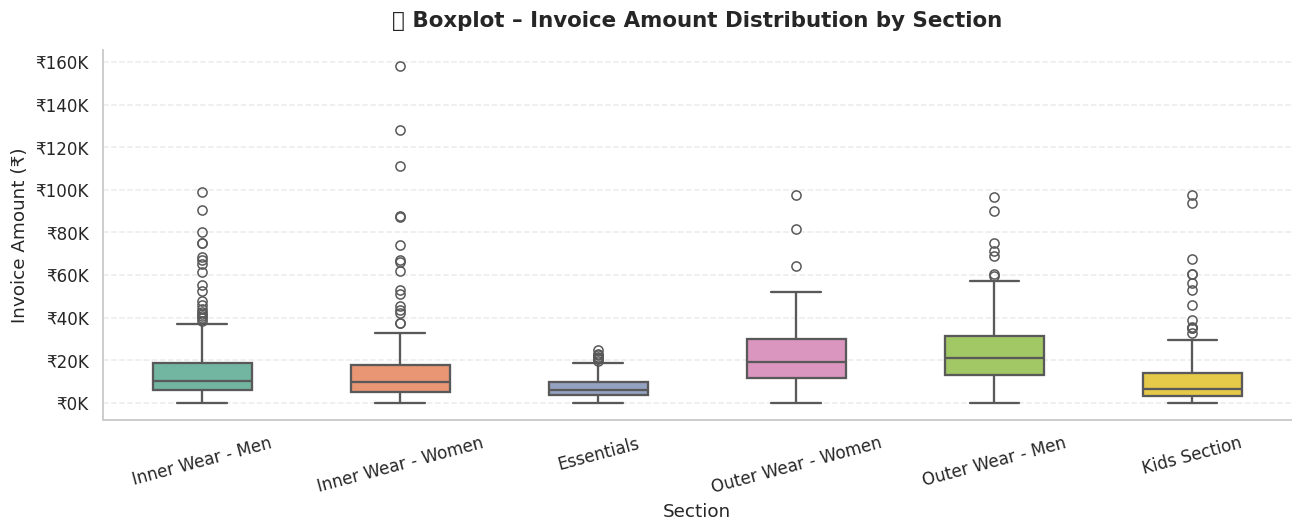

In [1]:
# ════════════════════════════════════════════════════
# SNS-3 │ BOXPLOT — Invoice Amount by Section
# ════════════════════════════════════════════════════
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(data=df, x='Section', y='Invoice_Amt',
            palette='Set2', width=0.5, linewidth=1.5, ax=ax)
ax.set_title('📦 Boxplot – Invoice Amount Distribution by Section', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Section'); ax.set_ylabel('Invoice Amount (₹)')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x,_: f'₹{x/1e3:.0f}K'))
ax.tick_params(axis='x', rotation=15)
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout(); plt.show()

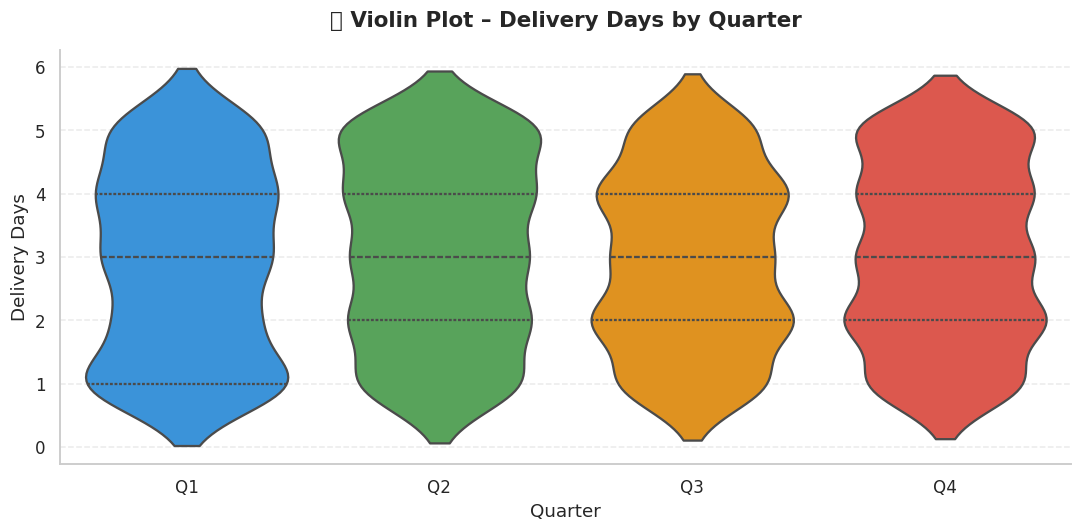

In [1]:
# ════════════════════════════════════════════════════
# SNS-4 │ VIOLIN PLOT — Delivery Days by Quarter
# ════════════════════════════════════════════════════
fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(data=df, x='Quarter', y='Delivery_Days',
               palette=['#2196F3','#4CAF50','#FF9800','#F44336'],
               inner='quartile', linewidth=1.5, ax=ax)
ax.set_title('🎻 Violin Plot – Delivery Days by Quarter', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Quarter'); ax.set_ylabel('Delivery Days')
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout(); plt.show()

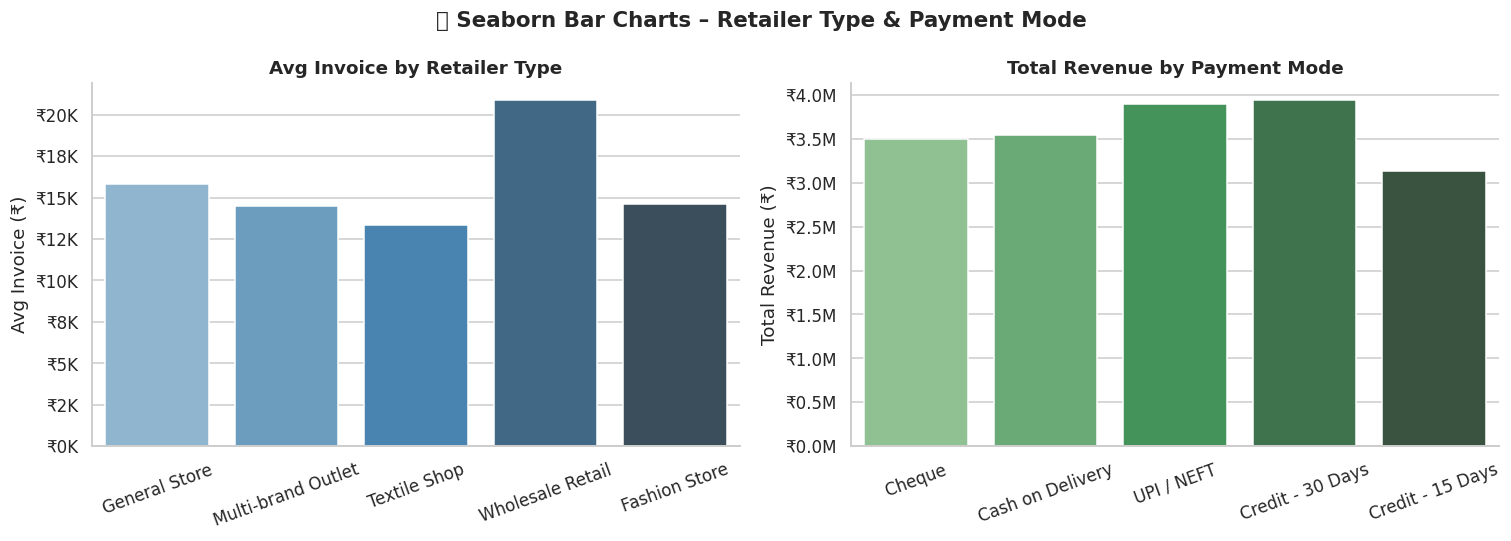

In [1]:
# ════════════════════════════════════════════════════
# SNS-5 │ BAR — Avg Invoice by Retailer Type & Payment Mode
# ════════════════════════════════════════════════════
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(data=df, x='Retailer_Type', y='Invoice_Amt',
            estimator='mean', palette='Blues_d', ax=ax1, errorbar=None)
ax1.set_title('Avg Invoice by Retailer Type', fontsize=12, fontweight='bold')
ax1.set_xlabel(''); ax1.set_ylabel('Avg Invoice (₹)')
ax1.tick_params(axis='x', rotation=20)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x,_: f'₹{x/1e3:.0f}K'))

sns.barplot(data=df, x='Payment_Mode', y='Invoice_Amt',
            estimator='sum', palette='Greens_d', ax=ax2, errorbar=None)
ax2.set_title('Total Revenue by Payment Mode', fontsize=12, fontweight='bold')
ax2.set_xlabel(''); ax2.set_ylabel('Total Revenue (₹)')
ax2.tick_params(axis='x', rotation=20)
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x,_: f'₹{x/1e6:.1f}M'))

fig.suptitle('📊 Seaborn Bar Charts – Retailer Type & Payment Mode', fontsize=14, fontweight='bold')
plt.tight_layout(); plt.show()

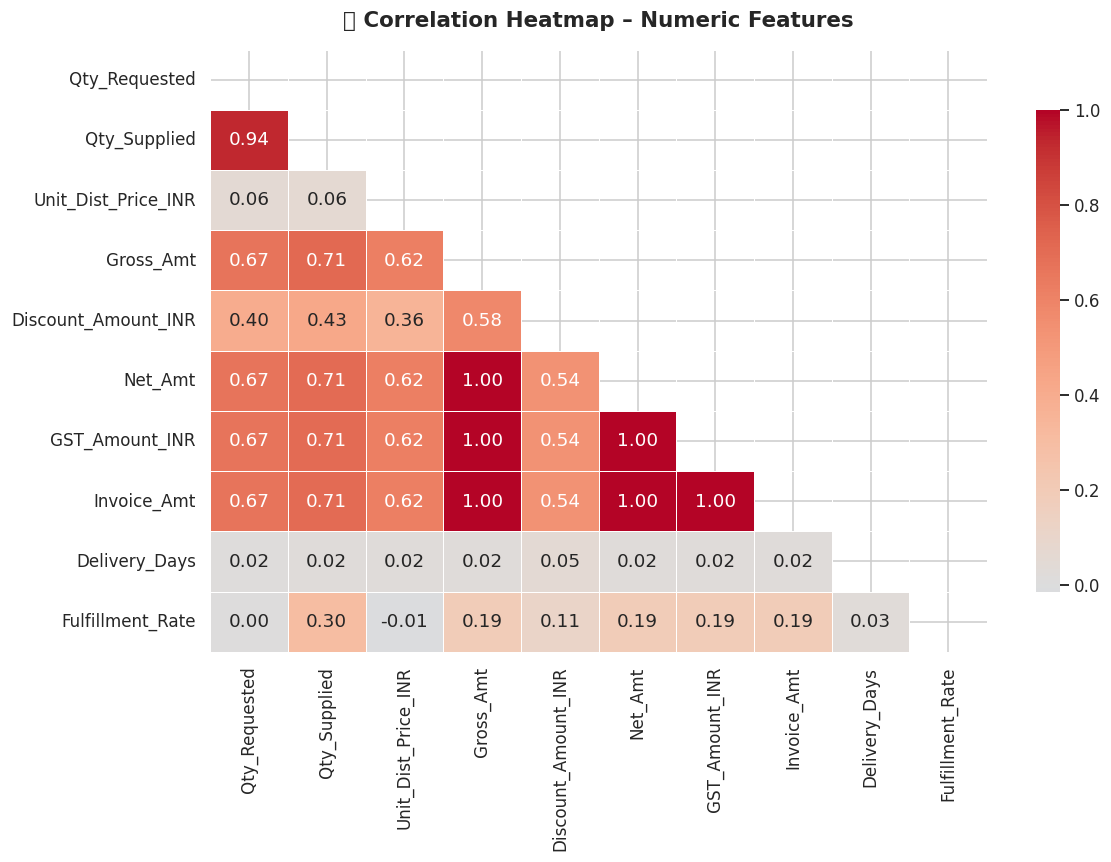

In [1]:
# ════════════════════════════════════════════════════
# SNS-6 │ CORRELATION HEATMAP — Numeric Columns
# ════════════════════════════════════════════════════
corr_cols = ['Qty_Requested','Qty_Supplied','Unit_Dist_Price_INR',
             'Gross_Amt','Discount_Amount_INR','Net_Amt',
             'GST_Amount_INR','Invoice_Amt','Delivery_Days','Fulfillment_Rate']
corr = df[corr_cols].corr()
fig, ax = plt.subplots(figsize=(11, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, linewidths=0.5, linecolor='white', ax=ax,
            cbar_kws={'shrink': 0.8})
ax.set_title('🔗 Correlation Heatmap – Numeric Features', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout(); plt.show()

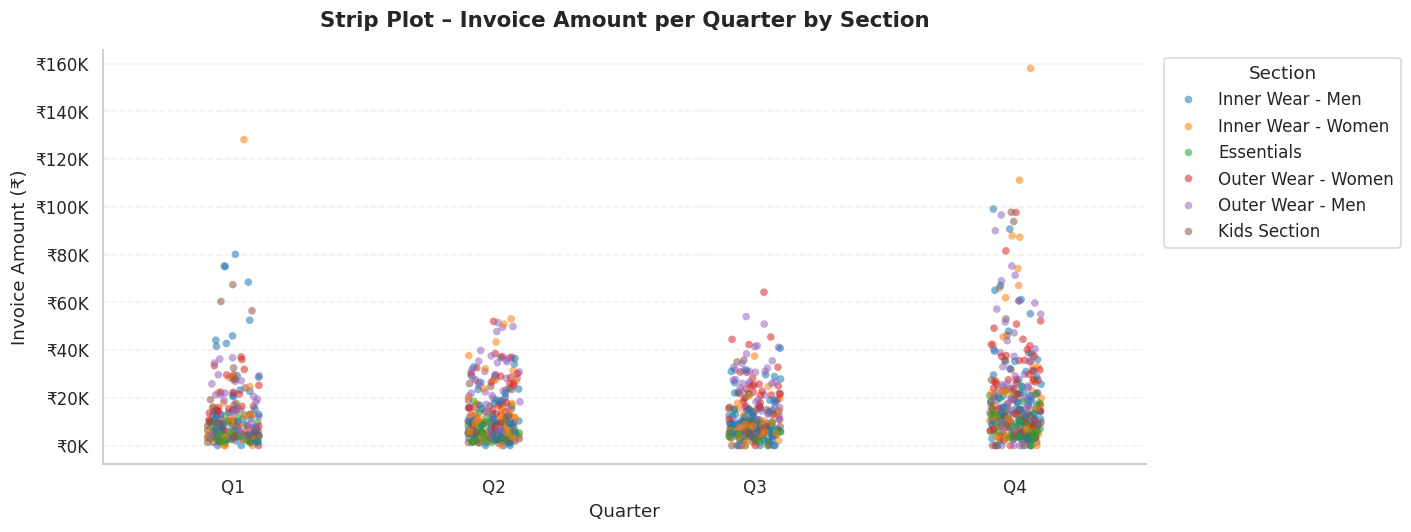

In [1]:
# ════════════════════════════════════════════════════
# SNS-7 │ STRIP PLOT — Invoice Amt by Quarter & Section
# ════════════════════════════════════════════════════
fig, ax = plt.subplots(figsize=(13, 5))
sns.stripplot(data=df, x='Quarter', y='Invoice_Amt', hue='Section',
              palette='tab10', alpha=0.55, size=5, jitter=True, ax=ax)
ax.set_title('Strip Plot – Invoice Amount per Quarter by Section',
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Quarter'); ax.set_ylabel('Invoice Amount (₹)')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x,_: f'₹{x/1e3:.0f}K'))
ax.legend(title='Section', bbox_to_anchor=(1.01, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout(); plt.show()

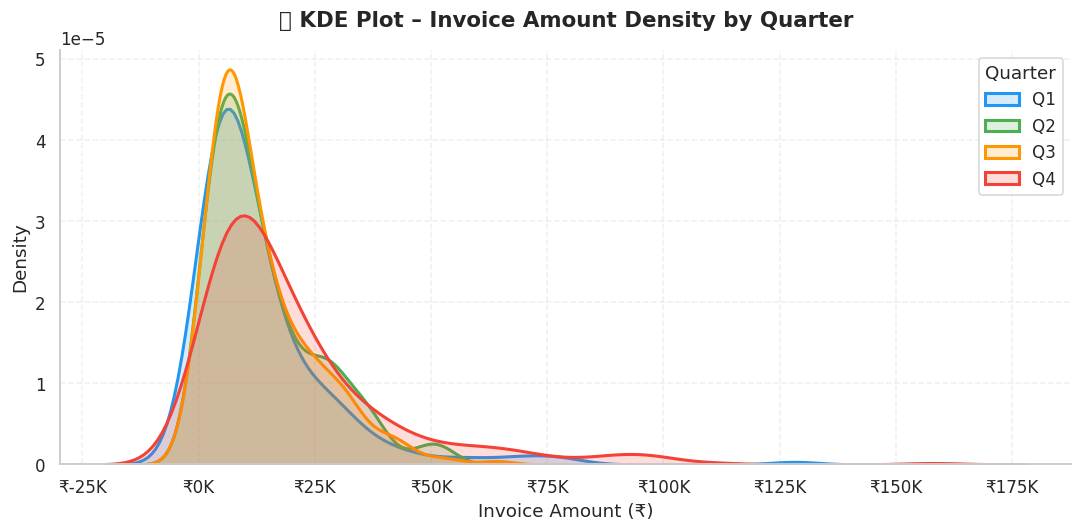

In [1]:
# ════════════════════════════════════════════════════
# SNS-8 │ KDE PLOT — Invoice Amount Density by Quarter
# ════════════════════════════════════════════════════
fig, ax = plt.subplots(figsize=(10, 5))
q_colors = {'Q1':'#2196F3','Q2':'#4CAF50','Q3':'#FF9800','Q4':'#F44336'}
for q, col in q_colors.items():
    sns.kdeplot(df[df['Quarter']==q]['Invoice_Amt'], ax=ax,
                color=col, linewidth=2, fill=True, alpha=0.18, label=q)
ax.set_title('🌊 KDE Plot – Invoice Amount Density by Quarter',
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Invoice Amount (₹)'); ax.set_ylabel('Density')
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x,_: f'₹{x/1e3:.0f}K'))
ax.legend(title='Quarter')
ax.grid(linestyle='--', alpha=0.3)
plt.tight_layout(); plt.show()

---
## ✅ Final – Cleaned Dataset Summary
---

In [1]:
print('=== FINAL DATASET ===')
print(f'Shape         : {df.shape}')
print(f'Date Range    : {df["Order_Date"].min().date()} → {df["Order_Date"].max().date()}')
print(f'Total Revenue : ₹{df["Invoice_Amt"].sum()/1e6:.2f} Million')
print(f'Total Orders  : {len(df)}')
print(f'Sections      : {df["Section"].nunique()}')
print(f'Retailers     : {df["Retailer_Name"].nunique()}')

df.to_csv('ChiragPaul_Jockey_2024_Cleaned.csv', index=False)
print('\n✅ Exported: ChiragPaul_Jockey_2024_Cleaned.csv')
df.tail()

=== FINAL DATASET ===
Shape         : (1138, 37)
Date Range    : 2024-01-01 → 2024-12-28
Total Revenue : ₹18.01 Million
Total Orders  : 1138
Sections      : 6
Retailers     : 17

✅ Exported: ChiragPaul_Jockey_2024_Cleaned.csv
